# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

plt.style.use("seaborn")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331857 entries, 0 to 2331856
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 166
Occurred Date                        0
Occurred Time                       85
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21075
Address                             12
Zip Code                         14448
Council District                 47528
APD Sector                        9193
APD District                      9679
PRA                              10967
Census Tract                    521966
Clearance Status                609972
Clearance Date                  340778
UCR Category                   1535179
Category Description           1535179
X-coordinate                     10369
Y-coordinate                     10369
Latitude                         39484
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2331852,20143631822,FAMILY DISTURBANCE,3400,N,12/29/2014 11:41:00 PM,12/29/2014,2341.0,12/29/2014 11:41:00 PM,12/29/2014,2341.0,RESIDENCE / HOME,109 MASTERSON PASS,78753.0,4.0,ED,1,240,18.23,N,01/02/2015,NaN,NaN,3130776.0,3130776.0,30.369795,-97.687855,"(30.36979494, -97.68785533)"
2331853,20191270738,THEFT BY SHOPLIFTING,607,N,05/07/2019 10:50:00 AM,05/07/2019,1050.0,05/07/2019 11:31:00 AM,05/07/2019,1131.0,DEPARTMENT / DISCOUNT STORE,11423 N LAMAR BLVD,78753.0,7.0,ED,4,221,18.24,NaN,NaN,23C,Theft,3131578.0,3131578.0,30.383630,-97.684932,"(30.38362955, -97.68493154)"
2331854,2008501470,CRIMINAL TRESPASS/TRANSIENT,2721,N,02/19/2008 05:00:00 PM,02/19/2008,1700.0,02/19/2008 05:00:00 PM,02/19/2008,1700.0,PARKING LOTS / GARAGE,6800 BERKMAN DR,78723.0,1.0,ID,5,293,21.00,NaN,NaN,NaN,NaN,3130390.0,3130390.0,30.320281,-97.690437,"(30.32028083, -97.6904366)"
2331855,2003921400113,DWI,2100,N,05/20/2003 01:32:00 AM,05/20/2003,132.0,05/20/2003 01:32:00 AM,05/20/2003,132.0,STREETS / HWY / ROAD / ALLEY,4500 N MOPAC EXPY NB,78731.0,10.0,BA,6,325,1.00,C,05/22/2003,NaN,NaN,3109748.0,3109748.0,30.320565,-97.755869,"(30.32056515, -97.7558693)"
2331856,20081340129,URINATING IN PUBLIC PLACE,3212,N,05/13/2008 01:10:00 AM,05/13/2008,110.0,05/13/2008 01:10:00 AM,05/13/2008,110.0,STREETS / HWY / ROAD / ALLEY,400 BLOCK E 6TH ST,78701.0,9.0,GE,2,382,11.00,C,05/17/2008,NaN,NaN,3115491.0,3115491.0,30.267351,-97.739093,"(30.26735144, -97.73909331)"


## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Incident Number",
        "Occurred Time",
        "Occurred Date Time",
        "Highest Offense Code",
        "Census Tract",
        "PRA",
        "Report Date",
        "Report Time",
        "UCR Category",
        "Category Description",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "clearance_status",
    ]
    df[fillna].fillna("N/A", inplace=True)
    date_col = ["occurred_date", "report_date_time", "clearance_date"]
    cat_col = [
        "highest_offense_description",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[date_col] = df[date_col].astype("datetime64")
    df[cat_col] = df[cat_col].astype("category")
    df["year"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.day
    df.set_index(["occurred_date"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [5]:
df.duplicated().sum()

835

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# Re-examining the dataframe
display(df.info())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2331022 entries, 2003-01-01 to 2021-05-08
Data columns (total 17 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     float64       
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   clearance_status             object        
 10  clearance_date               datetime64[ns]
 11  latitude                     float64       
 12  longitude                    float64       
 13  year                         int64         
 14  month                        int64         
 15  week                         int64

None

,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2003-01-01,IDENTITY THEFT,N,2009-05-01 12:02:00,RESIDENCE / HOME,12800 CENTER LAKE DR,78753.0,7.0,ED,6,NaN,NaT,30.407014,-97.668623,2003,1,1,1
2003-01-01,CRED CARD ABUSE - OTHER,N,2003-01-04 00:04:00,RESTAURANTS,5510 S I 35 SB SVC RD,78745.0,3.0,FR,2,N,NaT,30.200091,-97.763298,2003,1,1,1
2003-01-01,IDENTITY THEFT,N,2008-01-29 18:06:00,OTHER / UNKNOWN,10513 ROBINWOOD CIR,78758.0,4.0,ED,2,NaN,2008-02-05,30.381936,-97.707999,2003,1,1,1
2003-01-01,HINDER SECURED CREDITORS,N,2003-04-15 14:02:00,OTHER / UNKNOWN,7409 S CONGRESS AVE,78745.0,2.0,FR,3,NaN,2003-11-24,30.183658,-97.781612,2003,1,1,1
2003-01-01,THEFT OF SERVICE,N,2003-01-01 05:31:00,RESTAURANTS,707 E CESAR CHAVEZ ST,78701.0,9.0,GE,3,N,NaT,30.260991,-97.737392,2003,1,1,1


,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2021-05-08,AUTO THEFT,N,2021-05-08 03:51:00,GAS / SERVICE STATIONS,6004 FM 969 RD,78724.0,1.0,CH,6,NaN,NaT,30.285552,-97.664409,2021,5,18,8
2021-05-08,AIRPORT PLACES WEAPON PROHIBIT,N,2021-05-08 10:30:00,TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),3600 PRESIDENTIAL BLVD,78719.0,2.0,AP,S,NaN,NaT,30.202008,-97.666884,2021,5,18,8
2021-05-08,ASSAULT BY CONTACT,N,2021-05-08 05:29:00,STREETS / HWY / ROAD / ALLEY,BARTON SPRINGS RD / S 1ST ST,78704.0,9.0,DA,1,NaN,NaT,30.258382,-97.750075,2021,5,18,8
2021-05-08,CRIMINAL MISCHIEF,N,2021-05-08 13:22:00,STREETS / HWY / ROAD / ALLEY,11400 N IH 35 NB,78753.0,7.0,ED,6,NaN,NaT,30.421615,-97.672031,2021,5,18,8
2021-05-08,AUTO THEFT,N,2021-05-08 09:54:00,CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,7501 BLESSING AVE,78752.0,4.0,ID,1,C,2021-05-08,30.331461,-97.690574,2021,5,18,8


## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

,zip_code
78741.0,208894
78753.0,181209
78701.0,169946
78758.0,161663
78704.0,156474
78745.0,152671
78702.0,137921
78744.0,127803
78723.0,119833
78752.0,85448


,zip_code
78741.0,0.090173
78753.0,0.078223
78701.0,0.073361
78758.0,0.069785
78704.0,0.067545
78745.0,0.065904
78702.0,0.059536
78744.0,0.055169
78723.0,0.051728
78752.0,0.036885


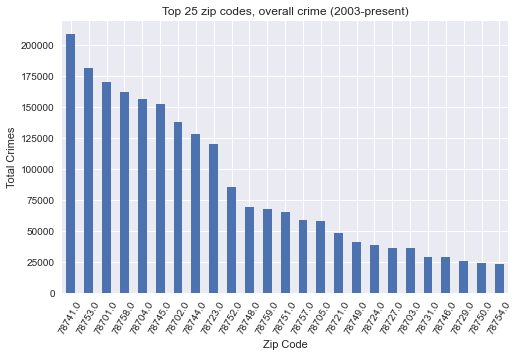

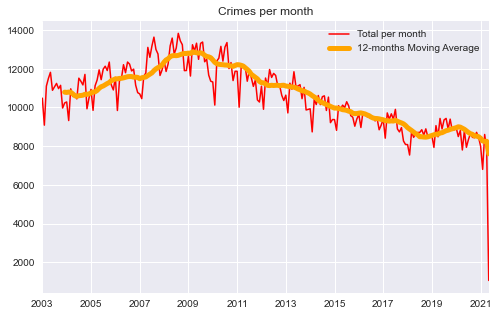

In [8]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25).to_frame())
display(df.zip_code.value_counts(normalize=True).head(25).to_frame())

# Visualizing the top 25 crime-ridden zip codes in Austin
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(8, 5),
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 5))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

,highest_offense_description
BURGLARY OF VEHICLE,232306
THEFT,213449
FAMILY DISTURBANCE,182252
CRIMINAL MISCHIEF,128835
ASSAULT W/INJURY-FAM/DATE VIOL,78900
BURGLARY OF RESIDENCE,77542
DWI,70084
PUBLIC INTOXICATION,68971
HARASSMENT,64913
DISTURBANCE - OTHER,62276


,BURGLARY OF VEHICLE,CRIMINAL MISCHIEF,FAMILY DISTURBANCE,HARASSMENT,DWI,BURGLARY OF RESIDENCE,PUBLIC INTOXICATION,ASSAULT W/INJURY-FAM/DATE VIOL,TOTAL
occurred_date,,,,,,,,,
2003-01-31,1230,723,505,293,407,328,341,349,4176
2003-02-28,1115,598,500,309,328,249,354,342,3795
2003-03-31,1229,701,546,363,406,394,450,421,4510
2003-04-30,1404,715,678,353,375,398,385,432,4740
2003-05-31,1496,752,650,345,418,436,451,424,4972
...,...,...,...,...,...,...,...,...,...
2021-01-31,360,432,815,255,169,128,55,256,2470
2021-02-28,309,338,812,167,130,118,62,245,2181
2021-03-31,432,430,876,192,179,154,75,259,2597


<Figure size 432x288 with 0 Axes>

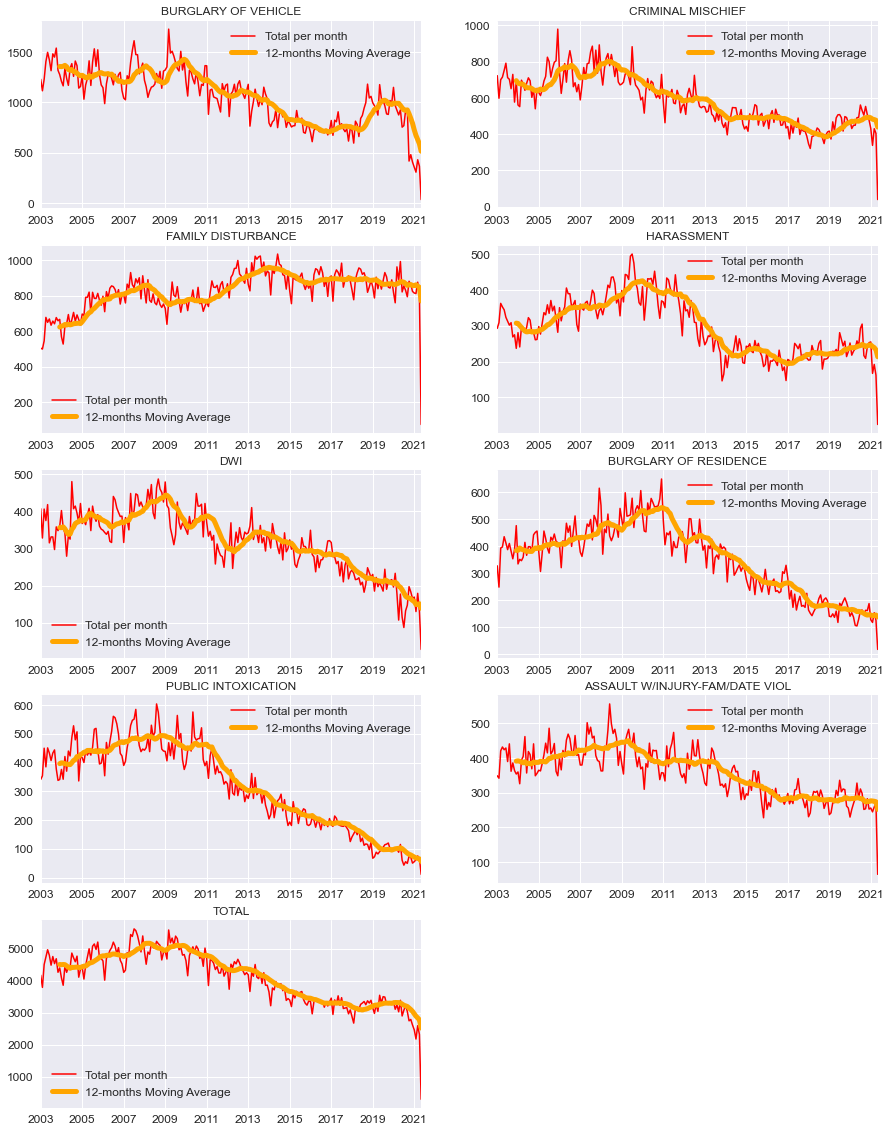

In [9]:
display(df["highest_offense_description"].value_counts().head(10).to_frame())

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly)

plt.figure(1)
plt.figure(figsize=(15, 20))

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

,highest_offense_description
PUBLIC INTOXICATION,17201
THEFT,15923
BURGLARY OF VEHICLE,9328
WARRANT ARREST NON TRAFFIC,8968
DWI,8351
ASSAULT WITH INJURY,7618
VIOL CITY ORDINANCE - OTHER,6192
POSS OF DRUG PARAPHERNALIA,6085
CRIMINAL MISCHIEF,5904
CRIMINAL TRESPASS,3950


,highest_offense_description
PUBLIC INTOXICATION,0.101215
THEFT,0.093694
BURGLARY OF VEHICLE,0.054888
WARRANT ARREST NON TRAFFIC,0.052770
DWI,0.049139
ASSAULT WITH INJURY,0.044826
VIOL CITY ORDINANCE - OTHER,0.036435
POSS OF DRUG PARAPHERNALIA,0.035805
CRIMINAL MISCHIEF,0.034740
CRIMINAL TRESPASS,0.023243


<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

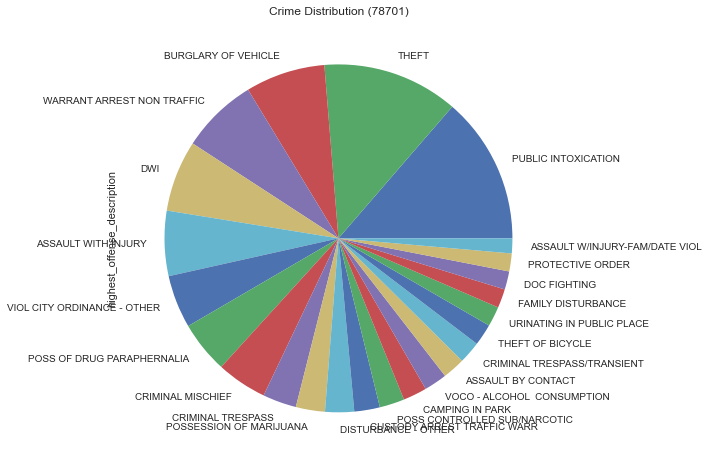

In [10]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off.to_frame())
display(df_01.highest_offense_description.value_counts(normalize=True).head(24).to_frame())
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

THEFT                             17267
BURGLARY OF VEHICLE               16015
FAMILY DISTURBANCE                14875
CRIMINAL MISCHIEF                  9560
THEFT BY SHOPLIFTING               7690
ASSAULT W/INJURY-FAM/DATE VIOL     7254
BURGLARY OF RESIDENCE              6105
DWI                                5081
DISTURBANCE - OTHER                4822
CUSTODY ARREST TRAFFIC WARR        4352
AUTO THEFT                         4305
HARASSMENT                         4298
POSS OF DRUG PARAPHERNALIA         3738
PUBLIC INTOXICATION                3377
ASSAULT WITH INJURY                3372
CRIMINAL TRESPASS                  3179
POSS CONTROLLED SUB/NARCOTIC       3006
RUNAWAY CHILD                      2961
WARRANT ARREST NON TRAFFIC         2798
POSSESSION OF MARIJUANA            2715
BURGLARY NON RESIDENCE             2520
VIOL CITY ORDINANCE - OTHER        1871
Name: highest_offense_description, dtype: int64
----------------------------------
THEFT                             0.0

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

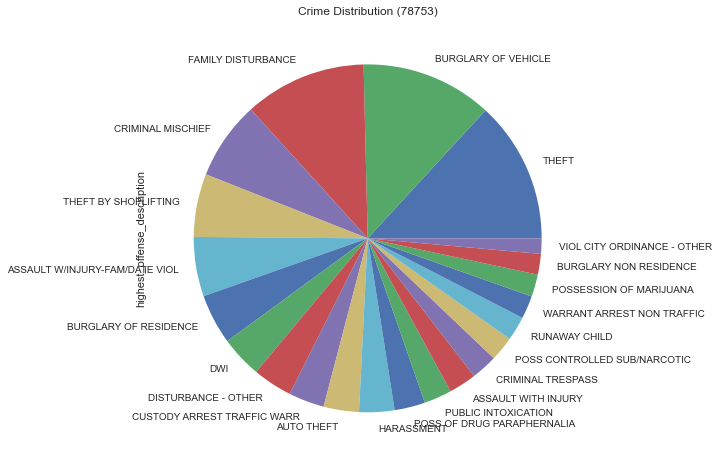

In [11]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
print(df_53_off)
print("----------------------------------")
print(df_53.highest_offense_description.value_counts(normalize=True).head(22))
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

FAMILY DISTURBANCE                20596
BURGLARY OF VEHICLE               19905
THEFT                             15712
CRIMINAL MISCHIEF                 11132
ASSAULT W/INJURY-FAM/DATE VIOL     9699
BURGLARY OF RESIDENCE              8923
PUBLIC INTOXICATION                6399
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5700
HARASSMENT                         5579
DISTURBANCE - OTHER                5216
AUTO THEFT                         4717
ASSAULT WITH INJURY                4578
CRIMINAL TRESPASS                  3965
POSS CONTROLLED SUB/NARCOTIC       3897
POSSESSION OF MARIJUANA            3805
THEFT BY SHOPLIFTING               3592
POSS OF DRUG PARAPHERNALIA         3552
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2806
VIOL CITY ORDINANCE - OTHER        2197
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.098595
BURGLARY OF VEHICLE               

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

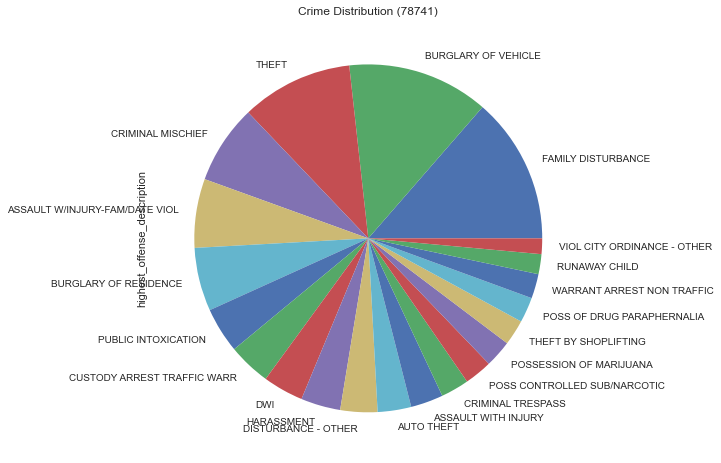

In [12]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
print(df_41_off)
print("----------------------------------")
print(df_41.highest_offense_description.value_counts(normalize=True).head(21))
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

FAMILY DISTURBANCE                15154
BURGLARY OF VEHICLE               14792
THEFT                             13658
CRIMINAL MISCHIEF                  8609
BURGLARY OF RESIDENCE              5886
ASSAULT W/INJURY-FAM/DATE VIOL     5807
HARASSMENT                         5179
DISTURBANCE - OTHER                4572
DWI                                4449
PUBLIC INTOXICATION                4010
CUSTODY ARREST TRAFFIC WARR        3248
AUTO THEFT                         2908
BURGLARY NON RESIDENCE             2891
ASSAULT WITH INJURY                2717
RUNAWAY CHILD                      2618
POSSESSION OF MARIJUANA            2595
WARRANT ARREST NON TRAFFIC         2109
POSS CONTROLLED SUB/NARCOTIC       2055
THEFT BY SHOPLIFTING               2010
CRIMINAL TRESPASS                  1972
IDENTITY THEFT                     1674
POSS OF DRUG PARAPHERNALIA         1528
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.0

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

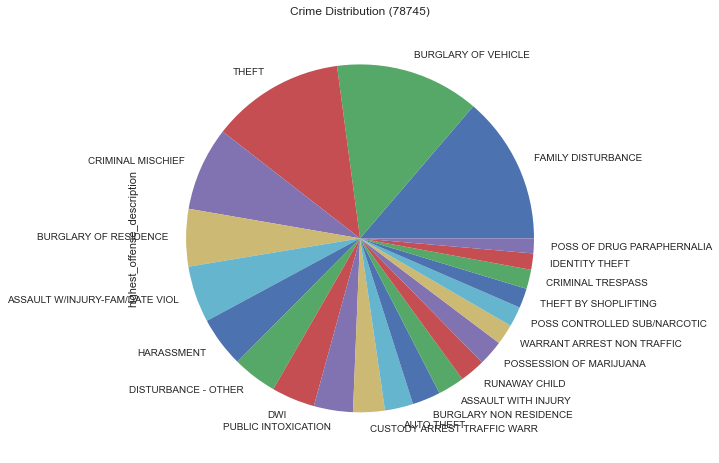

In [13]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
print(df_45_off)
print("----------------------------------")
print(df_45.highest_offense_description.value_counts(normalize=True).head(22))
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

BURGLARY OF VEHICLE               8689
THEFT                             5656
CRIMINAL MISCHIEF                 5003
THEFT OF BICYCLE                  3529
PUBLIC INTOXICATION               2633
BURGLARY OF RESIDENCE             2129
WARRANT ARREST NON TRAFFIC        1551
CRIMINAL TRESPASS                 1367
AUTO THEFT                        1356
ASSAULT WITH INJURY               1273
HARASSMENT                        1228
FAMILY DISTURBANCE                1221
DWI                               1221
DISTURBANCE - OTHER               1129
BURGLARY NON RESIDENCE             889
CRIMINAL TRESPASS/TRANSIENT        868
VIOL CITY ORDINANCE - OTHER        792
GRAFFITI                           785
CUSTODY ARREST TRAFFIC WARR        782
ASSAULT W/INJURY-FAM/DATE VIOL     704
POSSESSION OF MARIJUANA            663
ASSAULT BY CONTACT                 627
Name: highest_offense_description, dtype: int64

'----------------------------------'

BURGLARY OF VEHICLE               0.150194
THEFT                             0.097767
CRIMINAL MISCHIEF                 0.086479
THEFT OF BICYCLE                  0.061000
PUBLIC INTOXICATION               0.045513
BURGLARY OF RESIDENCE             0.036801
WARRANT ARREST NON TRAFFIC        0.026810
CRIMINAL TRESPASS                 0.023629
AUTO THEFT                        0.023439
ASSAULT WITH INJURY               0.022004
HARASSMENT                        0.021227
FAMILY DISTURBANCE                0.021106
DWI                               0.021106
DISTURBANCE - OTHER               0.019515
BURGLARY NON RESIDENCE            0.015367
CRIMINAL TRESPASS/TRANSIENT       0.015004
VIOL CITY ORDINANCE - OTHER       0.013690
GRAFFITI                          0.013569
CUSTODY ARREST TRAFFIC WARR       0.013517
ASSAULT W/INJURY-FAM/DATE VIOL    0.012169
POSSESSION OF MARIJUANA           0.011460
ASSAULT BY CONTACT                0.010838
Name: highest_offense_description, dtype: float64

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

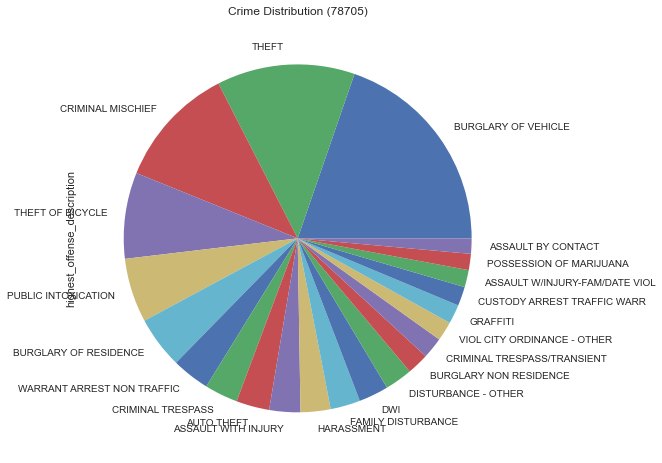

In [14]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off)
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22))
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

BURGLARY OF VEHICLE               5428
THEFT                             5110
THEFT BY SHOPLIFTING              2557
CRIMINAL MISCHIEF                 1276
DWI                                886
FAMILY DISTURBANCE                 774
VIOL CITY ORDINANCE - OTHER        652
HARASSMENT                         635
AUTO THEFT                         612
BURGLARY OF RESIDENCE              524
THEFT FROM PERSON                  462
IDENTITY THEFT                     452
DISTURBANCE - OTHER                436
BURGLARY NON RESIDENCE             359
ASSAULT W/INJURY-FAM/DATE VIOL     342
CRED CARD ABUSE - OTHER            330
PUBLIC INTOXICATION                321
POSSESSION OF MARIJUANA            297
FRAUD - OTHER                      283
SUSPICIOUS PERSON                  259
CUSTODY ARREST TRAFFIC WARR        247
WARRANT ARREST NON TRAFFIC         223
ASSAULT WITH INJURY                199
VIOL WATER SAFETY ACT              195
Name: highest_offense_description, dtype: int64

BURGLARY OF VEHICLE               0.190965
THEFT                             0.179778
THEFT BY SHOPLIFTING              0.089959
CRIMINAL MISCHIEF                 0.044892
DWI                               0.031171
FAMILY DISTURBANCE                0.027231
VIOL CITY ORDINANCE - OTHER       0.022938
HARASSMENT                        0.022340
AUTO THEFT                        0.021531
BURGLARY OF RESIDENCE             0.018435
THEFT FROM PERSON                 0.016254
IDENTITY THEFT                    0.015902
DISTURBANCE - OTHER               0.015339
BURGLARY NON RESIDENCE            0.012630
ASSAULT W/INJURY-FAM/DATE VIOL    0.012032
CRED CARD ABUSE - OTHER           0.011610
PUBLIC INTOXICATION               0.011293
POSSESSION OF MARIJUANA           0.010449
FRAUD - OTHER                     0.009956
SUSPICIOUS PERSON                 0.009112
CUSTODY ARREST TRAFFIC WARR       0.008690
WARRANT ARREST NON TRAFFIC        0.007845
ASSAULT WITH INJURY               0.007001
VIOL WATER 

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

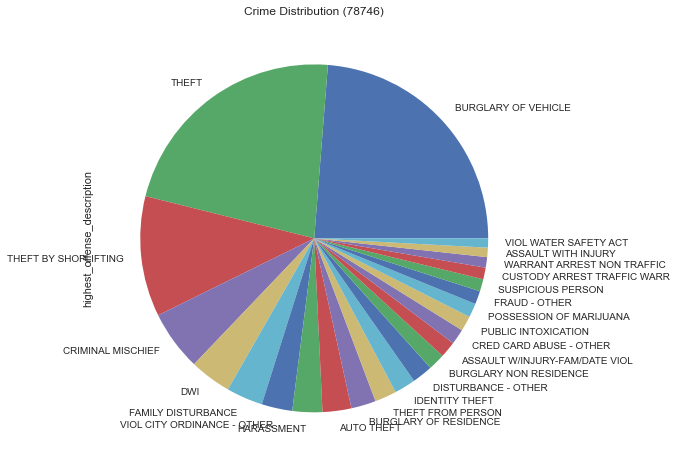

In [15]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off)
display(df_46.highest_offense_description.value_counts(normalize=True).head(24))
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [16]:
# Creating separate dataframes for violent crime & murder rates
df.highest_offense_description = df.highest_offense_description.replace(
    {
        "CAPITAL MURDER": "MURDER",
        "AGG ROBBERY/DEADLY WEAPON": "ARMED ROBBERY",
        "AGG ASSAULT": "AGGRAVATED ASSAULT",
    }
)

df_viol = df.query(
    'highest_offense_description == ["AGGRAVATED ASSAULT", "ARMED ROBBERY", "RAPE", "MURDER"]'
)
df_viol_mur = df_viol[df_viol.highest_offense_description == "MURDER"]
df_agg_asslt = df_viol[df_viol.highest_offense_description == "AGGRAVATED ASSAULT"]
df_agg_robbery = df_viol[df_viol.highest_offense_description == "ARMED ROBBERY"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]
df_21 = df[df.year == 2021]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]
df_viol_21 = df_viol[df_viol.year == 2021]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]
df_viol_mur_21 = df_viol_mur[df_viol_mur.year == 2021]

78741.0    0.130686
78753.0    0.099155
78758.0    0.094626
78701.0    0.074869
78723.0    0.074131
78702.0    0.073863
78745.0    0.057829
78752.0    0.052395
78744.0    0.051758
78704.0    0.048101
78721.0    0.027942
78724.0    0.024386
78705.0    0.021602
78757.0    0.020663
78748.0    0.017409
78751.0    0.017040
78759.0    0.013921
78722.0    0.009392
78754.0    0.008487
78727.0    0.007950
78749.0    0.007782
78617.0    0.007681
78729.0    0.007212
78750.0    0.005669
78731.0    0.005199
Name: zip_code, dtype: float64

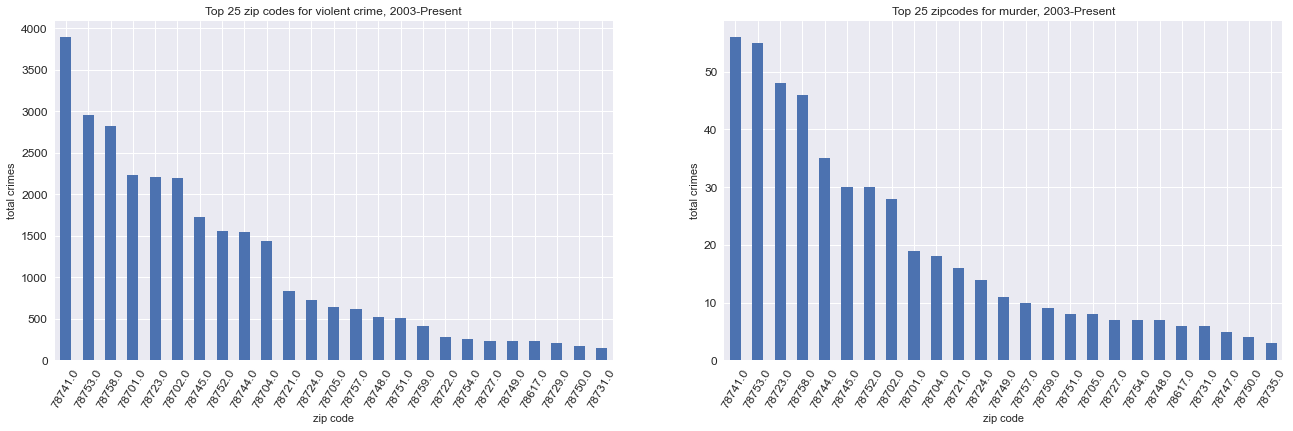

highest_offense_description,AGGRAVATED ASSAULT,ARMED ROBBERY,MURDER,RAPE
zip_code,,,,
78610.0,1,0,0,1
78613.0,15,11,1,7
78617.0,124,62,6,37
78621.0,1,0,0,0
78634.0,1,0,0,0
78652.0,3,0,0,0
78653.0,10,3,1,1
78660.0,64,30,2,19
78664.0,3,0,0,0


<Figure size 432x288 with 0 Axes>

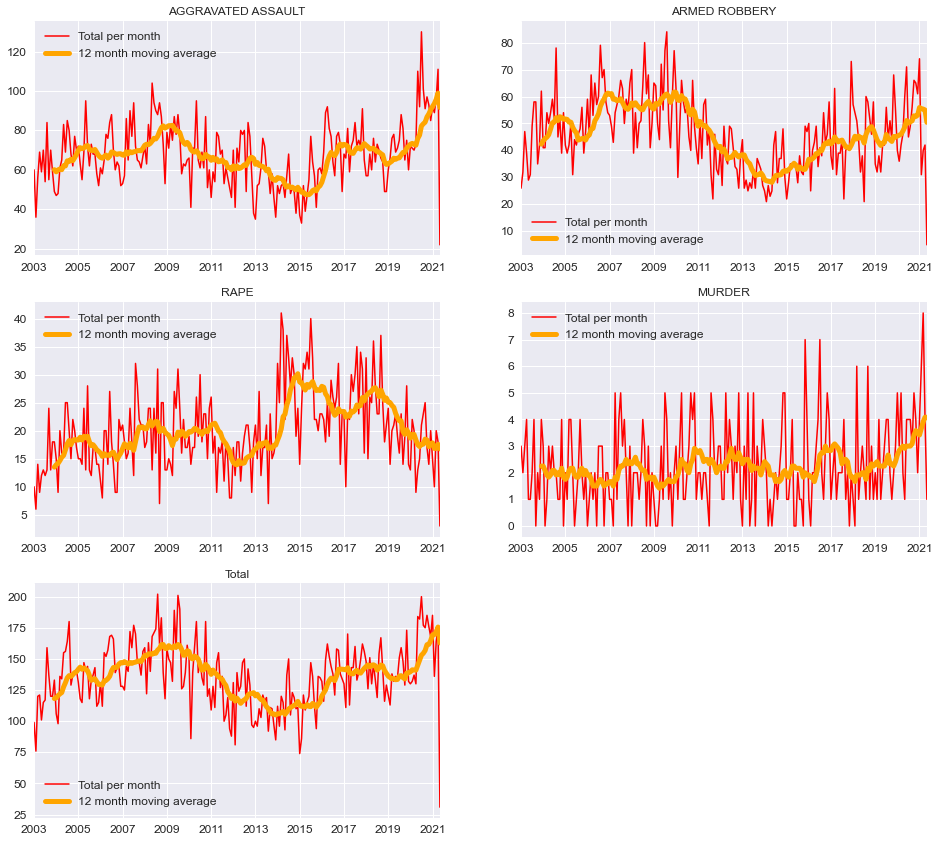

In [17]:
display(df_viol.zip_code.value_counts(normalize=True).head(25))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly_viol = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGGRAVATED ASSAULT"]
    .resample("M")
    .size()
)
monthly_viol.columns = ["AGGRAVATED ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly_viol[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly_viol["Total"] = monthly_viol.sum(axis=1)

ViolCrimeTypes = monthly_viol.columns

plt.figure(1)
plt.figure(figsize=(16, 25))

i = 521
for eachCrime in ViolCrimeTypes:
    plt.subplot(i)
    monthly_viol[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly_viol[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1


viol_freq.to_csv("viol_freq.csv")
mur_freq.to_csv("mur_freq.csv")

### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

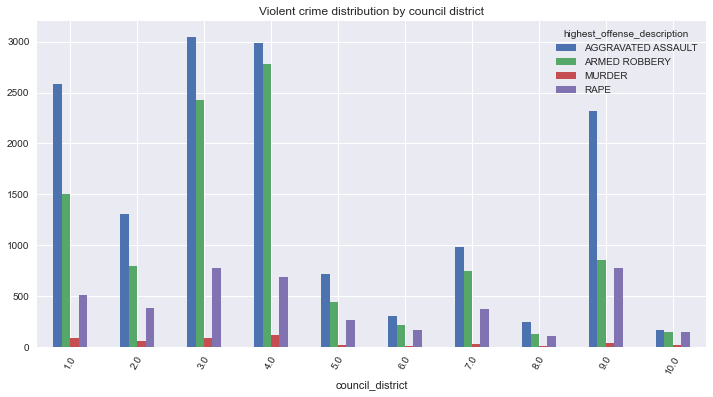

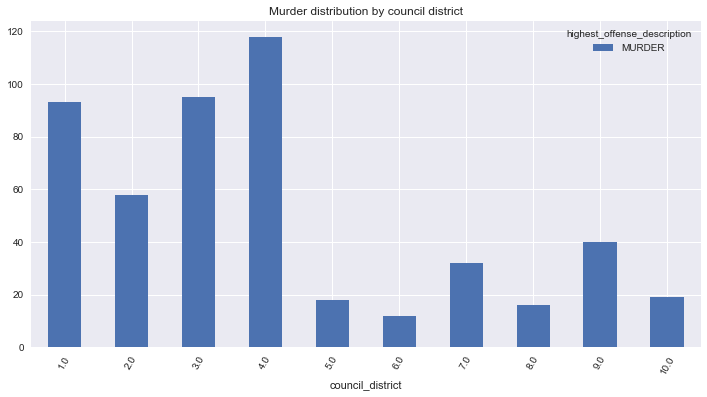

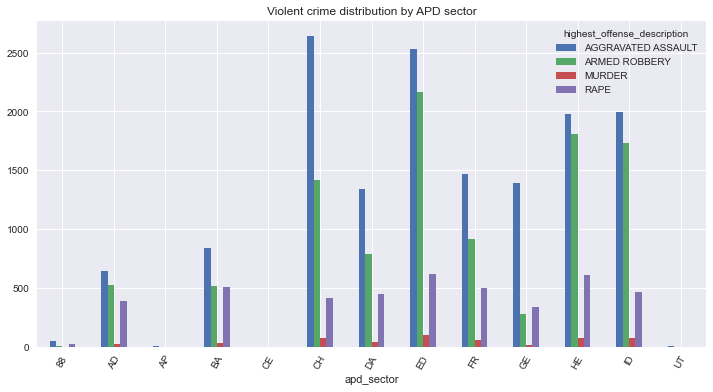

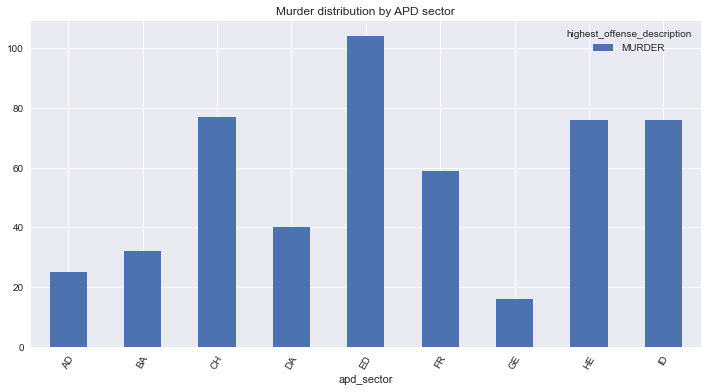

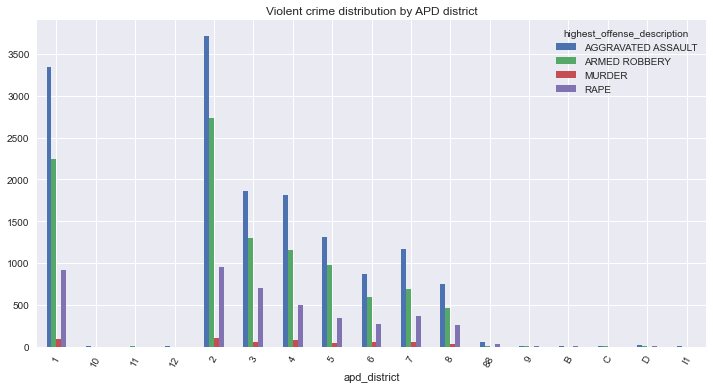

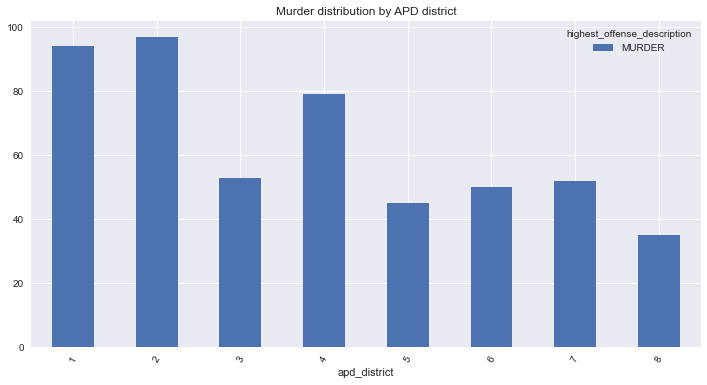

In [18]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(figsize=(12, 6), rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD district"
)
plt.show()

### K. Violent crime and murder distribution by location type

highest_offense_description,AGGRAVATED ASSAULT,ARMED ROBBERY,MURDER,RAPE
location_type,,,,
ABANDONED/CONDEMNED STRUCTURE,14,7,1,4
AMUSEMENT PARK,0,2,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,2,0,0,0
ATM SEPARATE FROM BANK,1,3,0,0
AUTO DEALERSHIP NEW / USED,10,2,0,1
BANKS / SAVINGS & LOAN,5,134,1,1
BAR / NIGHT CLUB,674,46,10,79
CAMP / CAMPGROUND,24,2,0,3
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,21,5,1,7


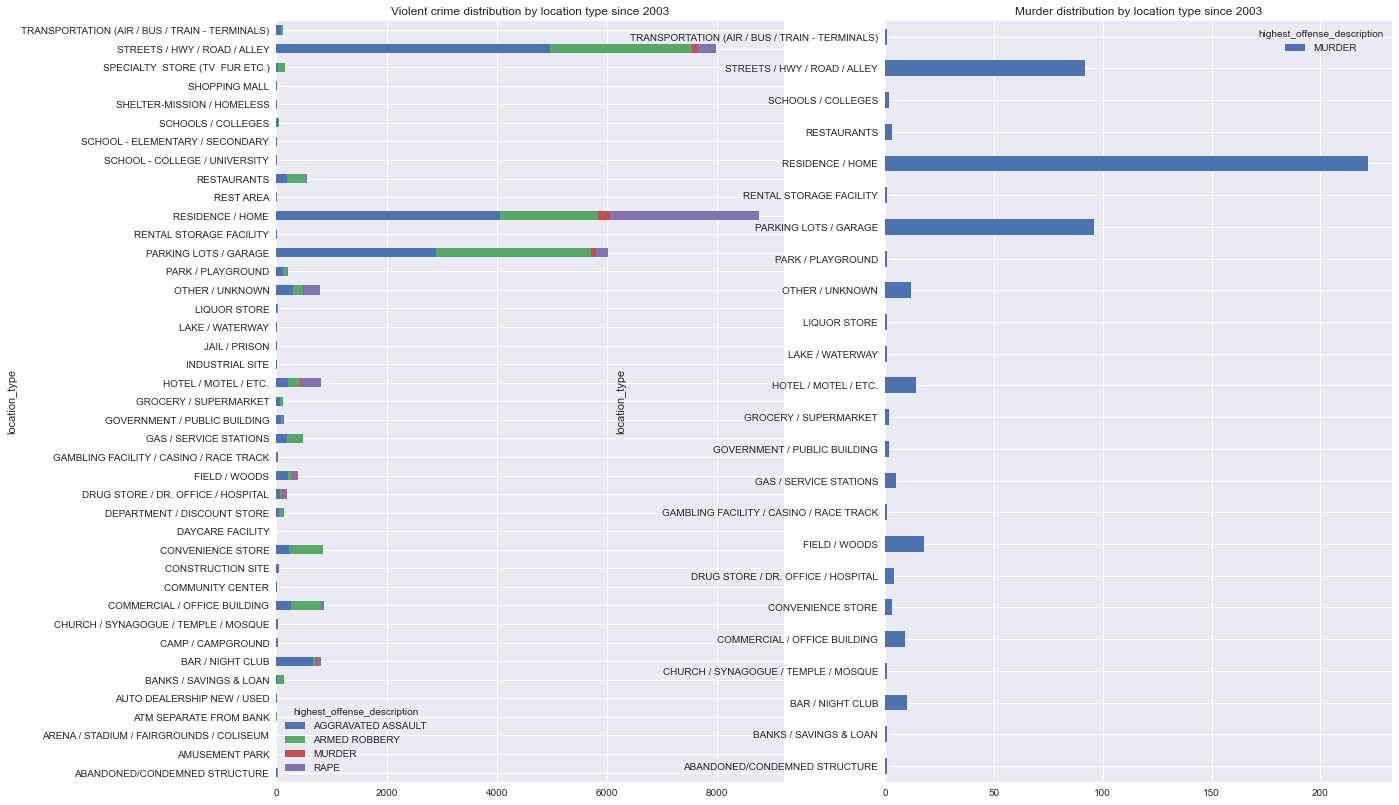

In [19]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003",
    ax=axs[0],
    stacked=True,
)
mur_loc.plot.barh(title="Murder distribution by location type since 2003", ax=axs[1])
plt.show()


viol_loc.to_csv("viol_loc.csv")

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [20]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [21]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [22]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [23]:
df.address.value_counts().head(50).to_frame()

,address
4110 GUADALUPE ST,11633
1030 NORWOOD PARK BLVD,9236
2901 S CAPITAL OF TEXAS HWY NB,8141
3600 PRESIDENTIAL BLVD,7398
500 E 7TH ST,6124
1000 E 41ST ST,5839
3708 S 2ND ST,5257
2508 E RIVERSIDE DR,4845
11200 LAKELINE MALL DR,4510
9300 S IH 35 SVRD SB,4085


In [24]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13).to_frame()

,address
500 E 7TH ST,83
9515 N LAMAR BLVD,67
1700 BURTON DR,63
6409 SPRINGDALE RD,59
00 BLOCK UNKNOWN,59
9601 MIDDLE FISKVILLE RD,58
1071 CLAYTON LN,55
900 BLOCK E 32ND ST,55
1030 NORWOOD PARK BLVD,53
9200 NORTH PLZ,53


In [25]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30).to_frame()

,address
8610 N LAMAR BLVD,3
6409 SPRINGDALE RD,3
8800 N IH 35 SVRD SB,3
6407 SPRINGDALE RD,3
4700 E RIVERSIDE DR,3
601 E 15TH ST,2
201 W 5TH ST,2
605 MASTERSON PASS,2
2915 S IH 35 SVRD NB,2
9601 MIDDLE FISKVILLE RD,2


In [26]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")
df_21.to_csv("df_21.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")
df_viol_21.to_csv("df_viol_21.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")
df_viol_mur_21.to_csv("df_viol_mur_21.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")